<a href="https://colab.research.google.com/github/emanuel379/Estatistica-I/blob/main/Aula_pratica_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Simulado do projeto: De prédio em prédio

Uma instalação é constituída por vários prédios, como esquematizado na Figura. Existem conexões entre os prédios, que também estão marcadas. Um móvel se desloca pela instalação em tempo discreto, sabendo-se que a cada passo de tempo ele muda de prédio. As mudanças de prédio são aos prédios vizinhos, isto é, aos
conectados, com igual probabilidade de ir para cada um deles. Por exemplo, se no tempo $t$ o móvel está no prédio 5 (ver figura), a tempo $t + 1$ ele estará nos prédios 1, 3, 4 ou 7, com igual probabilidade.
Iniciando no prédio 1, e considerando um tempo de estudo de 200, deseja-se conhecer as variáveis aleatórias $T_i$ correspondentes ao tempo passado em cada prédio $i$, com $i = 1, ... , 7$.

a) Deseja-se também saber a quantidade de vezes que cada conexão é utilizada. Qual é a conexão com mais tráfego?

b) Suponha que o móvel, toda vez que passa pelo prédio 1, carrega sua bateria. Quanto deve ser a autonomia da bateria para ter 99% de certeza de que o móvel conseguiá chegar ao tempo 200 sem nunca esvaziar totalmente a bateria?

c) Qual é a probabilidade de achar o móvel, no tempo 200, em cada um dos 7 prédios?

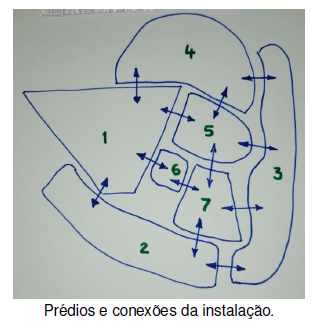




In [ ]:
# Função auxiliar para gerar os dados
import numpy as np
def Predio(nsteps):
  probtrans = np.array([[0, 1/4, 0, 1/4, 1/4, 1/4, 0],
                      [1/3, 0, 1/3, 0, 0, 0, 1/3],
                      [0, 1/4, 0, 1/4, 1/4, 0, 1/4],
                      [1/3, 0, 1/3, 0, 1/3, 0, 0],
                      [1/4, 0, 1/4, 1/4, 0, 0, 1/4],
                      [1/2, 0, 0, 0, 0, 0, 1/2],
                      [0, 1/4, 1/4, 0, 1/4, 1/4, 0]])
  state = [0]
  contador_transic = np.zeros((7, 7))
  tbat = [0]
  for step in range(nsteps):
    sold = state[step]
    vetprob = probtrans[sold, ]
    snew = np.random.choice(7, p = vetprob) #escolhe um numero de zero a 6, usando as probabilidades dadas em vetprob
    state.append(snew)
    contador_transic[sold, snew] += 1 #se foi do 0 pro 2 entao na linha 0 coluna 2 vai adicionar 1, para saber que foi do zero pro 2
    if snew == 0:
      tbat.append(0)
    else:
      tbat.append(tbat[step] + 1)
  return state, tbat, contador_transic


In [ ]:
estados, tbateria, cont_trans = Predio(10)
print(estados)
print(tbateria)
print(cont_trans)

[0, 5, 0, 5, 6, 1, 2, 4, 6, 4, 6]
[0, 1, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[[0. 0. 0. 0. 0. 2. 0.]
 [0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 2.]
 [1. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0. 0.]]


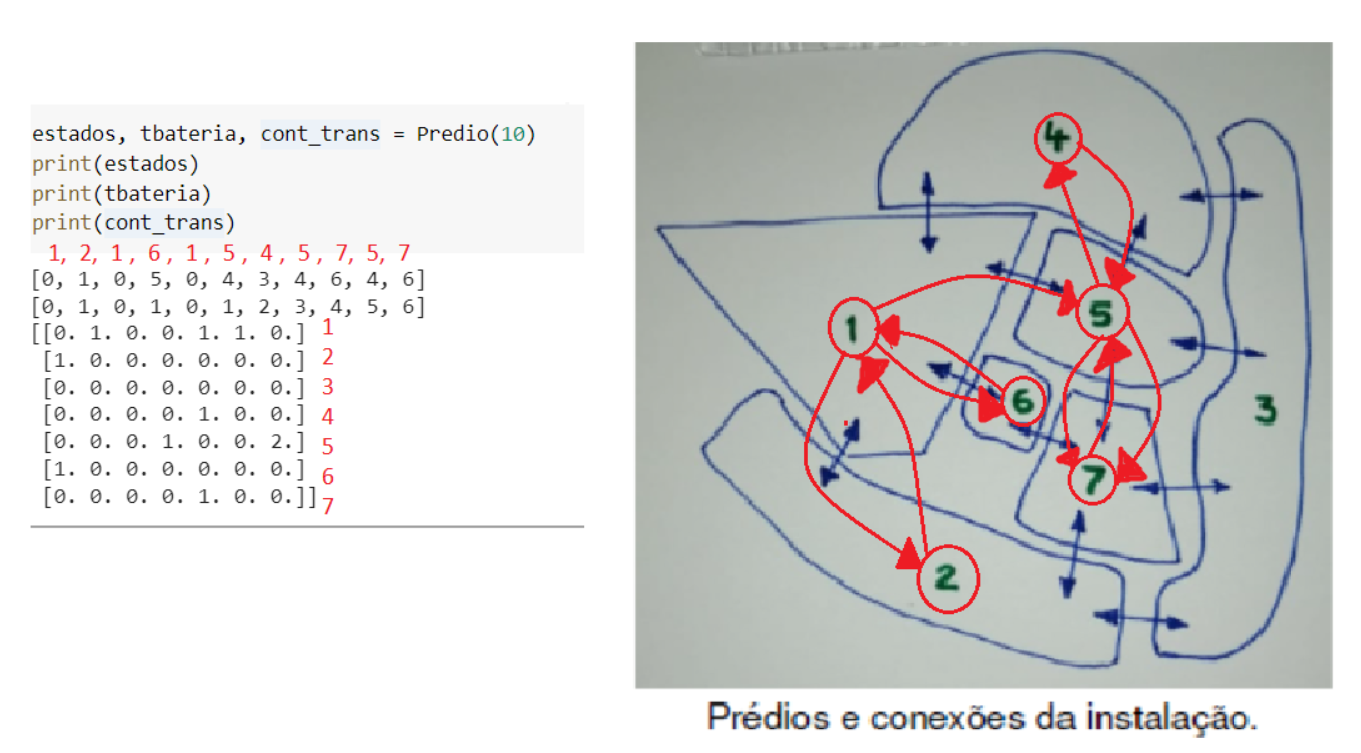

## Gerando os dados

In [ ]:
import pandas as pd

colunas = []
for i in range(1,8):
    coluna = "frac " + str(i)
    colunas.append(coluna)

colunas.append("MaxBateria")
colunas.append("state100")
colunas.append("state200")

for i in range(1,8):
    for j in range(1,8):
        coluna = "trans " + str(i) + " -> " + str(j)
        colunas.append(coluna)

print(colunas)
len(colunas)

['frac 1', 'frac 2', 'frac 3', 'frac 4', 'frac 5', 'frac 6', 'frac 7', 'MaxBateria', 'state100', 'state200', 'trans 1 -> 1', 'trans 1 -> 2', 'trans 1 -> 3', 'trans 1 -> 4', 'trans 1 -> 5', 'trans 1 -> 6', 'trans 1 -> 7', 'trans 2 -> 1', 'trans 2 -> 2', 'trans 2 -> 3', 'trans 2 -> 4', 'trans 2 -> 5', 'trans 2 -> 6', 'trans 2 -> 7', 'trans 3 -> 1', 'trans 3 -> 2', 'trans 3 -> 3', 'trans 3 -> 4', 'trans 3 -> 5', 'trans 3 -> 6', 'trans 3 -> 7', 'trans 4 -> 1', 'trans 4 -> 2', 'trans 4 -> 3', 'trans 4 -> 4', 'trans 4 -> 5', 'trans 4 -> 6', 'trans 4 -> 7', 'trans 5 -> 1', 'trans 5 -> 2', 'trans 5 -> 3', 'trans 5 -> 4', 'trans 5 -> 5', 'trans 5 -> 6', 'trans 5 -> 7', 'trans 6 -> 1', 'trans 6 -> 2', 'trans 6 -> 3', 'trans 6 -> 4', 'trans 6 -> 5', 'trans 6 -> 6', 'trans 6 -> 7', 'trans 7 -> 1', 'trans 7 -> 2', 'trans 7 -> 3', 'trans 7 -> 4', 'trans 7 -> 5', 'trans 7 -> 6', 'trans 7 -> 7']


59

In [ ]:
data = np.zeros((1,59))
df = pd.DataFrame(data, columns = colunas)
df

,frac 1,frac 2,frac 3,frac 4,frac 5,frac 6,frac 7,MaxBateria,state100,state200,...,trans 6 -> 5,trans 6 -> 6,trans 6 -> 7,trans 7 -> 1,trans 7 -> 2,trans 7 -> 3,trans 7 -> 4,trans 7 -> 5,trans 7 -> 6,trans 7 -> 7
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
import numpy as np
np.random.seed(1)
data=[]
nsamples=1000
nsteps=200
for kk in range(nsamples):
  novalinha = []
  estados, tbateria, cont_trans = Predio(nsteps)
  contpredios=[0]*7
  for state in estados[1:]:
    contpredios[state] += 1
  tfrac=[k/nsteps for k in contpredios]
  for item in tfrac:
      novalinha.append(item)
  maxtbat = max(tbateria)
  novalinha.append(maxtbat)
  estadom100 = estados[-101]
  novalinha.append(estadom100)
  estadofinal = estados[-1]
  novalinha.append(estadofinal)
  for i in range(7):
      for j in range(7):
        novalinha.append(cont_trans[i][j])
  df.loc[kk] = novalinha


In [ ]:
df

,frac 1,frac 2,frac 3,frac 4,frac 5,frac 6,frac 7,MaxBateria,state100,state200,...,trans 6 -> 5,trans 6 -> 6,trans 6 -> 7,trans 7 -> 1,trans 7 -> 2,trans 7 -> 3,trans 7 -> 4,trans 7 -> 5,trans 7 -> 6,trans 7 -> 7
0,0.205,0.120,0.120,0.105,0.200,0.090,0.160,18.0,4.0,6.0,...,0.0,0.0,7.0,0.0,5.0,7.0,0.0,11.0,8.0,0.0
1,0.135,0.100,0.170,0.150,0.165,0.090,0.190,18.0,0.0,2.0,...,0.0,0.0,11.0,0.0,8.0,8.0,0.0,13.0,9.0,0.0
2,0.125,0.180,0.220,0.085,0.115,0.065,0.210,23.0,0.0,0.0,...,0.0,0.0,7.0,0.0,12.0,12.0,0.0,9.0,9.0,0.0
3,0.150,0.130,0.175,0.105,0.175,0.070,0.195,25.0,2.0,6.0,...,0.0,0.0,7.0,0.0,13.0,12.0,0.0,10.0,3.0,0.0
4,0.155,0.125,0.220,0.120,0.165,0.050,0.165,27.0,2.0,6.0,...,0.0,0.0,3.0,0.0,7.0,13.0,0.0,6.0,6.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.150,0.100,0.145,0.115,0.175,0.120,0.195,34.0,4.0,1.0,...,0.0,0.0,16.0,0.0,9.0,6.0,0.0,11.0,13.0,0.0
996,0.185,0.105,0.180,0.165,0.185,0.060,0.120,17.0,3.0,3.0,...,0.0,0.0,3.0,0.0,8.0,8.0,0.0,5.0,3.0,0.0
997,0.180,0.095,0.155,0.135,0.190,0.095,0.150,14.0,5.0,6.0,...,0.0,0.0,9.0,0.0,6.0,8.0,0.0,8.0,7.0,0.0
998,0.170,0.140,0.160,0.125,0.175,0.080,0.150,25.0,6.0,1.0,...,0.0,0.0,11.0,0.0,11.0,6.0,0.0,4.0,9.0,0.0


## Fazendo os gráficos

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

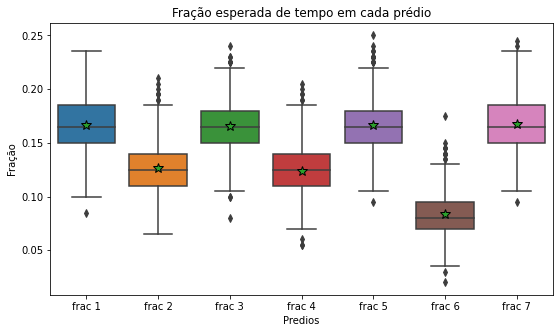

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(data = df[["frac 1","frac 2","frac 3","frac 4","frac 5","frac 6","frac 7"]], showmeans=True, meanprops={"marker": "*", "markeredgecolor": "black", "markersize": "10"}).set(title='Fração esperada de tempo em cada prédio')
plt.xlabel('Predios')
plt.ylabel('Fração')
plt.show()

Com a Figura acima podemos observar que a variabilidade do tempo que o móvel passa nos prédios pode ser considera iguais para cada predio, com excessão ao pédio 6, onde a fração de tempo que o móvel passa por esse prédio tem uma variabilidade menor e a mediana é apenas $10\%$. Isso esta relacionado com a sua posição e conexão com os outros prédios, pois temos apenas 2 conexões com o prédio 6, ou seja duas possibilidades de chegar a esse prédio. Observem também que o tempo que o móvel passa pelos prédios 1, 3, 5 e 7 são proximos de $16\%$. Os prédios que possuem uma fração de tempo maior(prédios 1, 3, 5 e 7) são os prédios que possuem 4 possibilidades de conexão com os outros prédios.

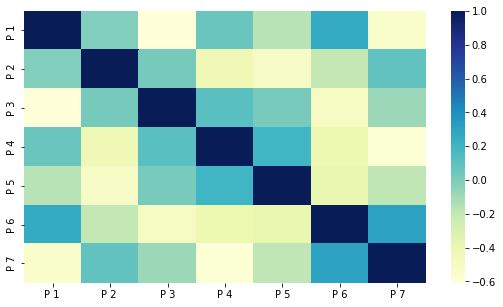

In [ ]:
df_aux = df[["frac 1","frac 2","frac 3","frac 4","frac 5","frac 6","frac 7"]]
matriz = df_aux.corr()
plt.figure(figsize=(9,5))
sns.heatmap(data = matriz, cmap="YlGnBu",
            xticklabels=['P 1 ', 'P 2 ', 'P 3', 'P 4', 'P 5','P 6', 'P 7'],
            yticklabels=['P 1 ', 'P 2 ', 'P 3', 'P 4', 'P 5','P 6', 'P 7'])
plt.show()

Podemos observar nessa Figura que o prédio 1 e o prédio 3 possuem uma correlação negativa forte, ou seja quanto mais tempo o móvel passa no prédio 1, menos tempo esse móvel vai passar no prédio 3.

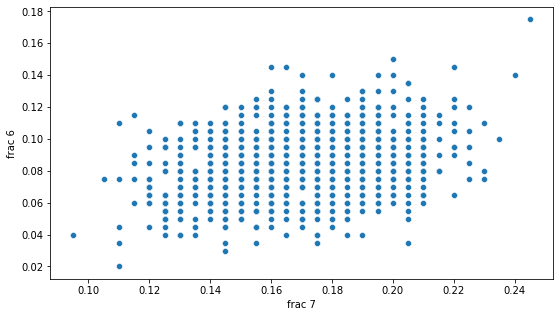

In [ ]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = df, x = "frac 1", y = "frac 3")
plt.show()

podemos ver que quando o móvel passa mais de $20\%$ no prédio 3, esse móvel passa menos de $10\%$ no predio 1.

 Quanto deve ser a autonomia da bateria para ter $99\%$ de certeza de que o movel conseguira chegar ao  tempo 200 sem nunca esvaziar totalmente
a bateria?


41.0


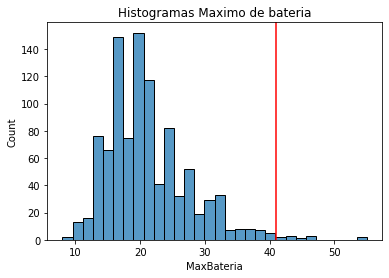

In [ ]:
ax = sns.histplot(data = df, x = "MaxBateria")
ax.axvline(x = df["MaxBateria"].quantile(0.99) , color = 'red')
plt.title('Histogramas Maximo de bateria')
print(df["MaxBateria"].quantile(0.99))
plt.show()

In [ ]:
matriz_aux = []
for i in range(1,8):
    linha = []
    for j in range(1,8):
        coluna = "trans " + str(i) + " -> " + str(j)
        media = df[coluna].mean()
        linha.append(media)
    matriz_aux.append(linha)
print(matriz_aux)

[[0.0, 8.554, 0.0, 8.49, 8.543, 8.513, 0.0], [8.362, 0.0, 8.299, 0.0, 0.0, 0.0, 8.451], [0.0, 8.201, 0.0, 8.125, 8.364, 0.0, 8.236], [8.211, 0.0, 8.374, 0.0, 8.137, 0.0, 0.0], [8.478, 0.0, 8.15, 8.225, 0.0, 0.0, 8.288], [8.207, 0.0, 0.0, 0.0, 0.0, 0.0, 8.489], [0.0, 8.502, 8.269, 0.0, 8.271, 8.261, 0.0]]


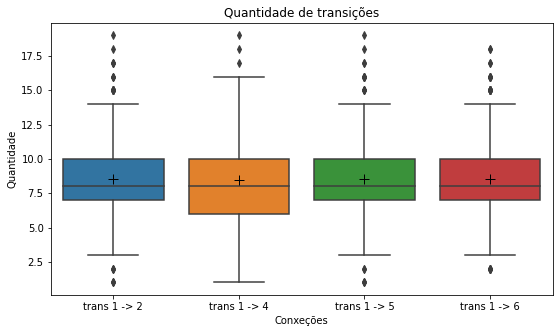

In [ ]:
plt.figure(figsize=(9,5))
sns.boxplot(data = df[["trans 1 -> 2","trans 1 -> 4","trans 1 -> 5","trans 1 -> 6"]], showmeans=True, meanprops={"marker": "+", "markeredgecolor": "black", "markersize": "10"}).set(title='Quantidade de transições')
plt.xlabel('Conexões')
plt.ylabel('Quantidade')
plt.show()

In [ ]:
cont_trans = np.matrix(matriz_aux)
cont_trans

matrix([[0.   , 8.554, 0.   , 8.49 , 8.543, 8.513, 0.   ],
        [8.362, 0.   , 8.299, 0.   , 0.   , 0.   , 8.451],
        [0.   , 8.201, 0.   , 8.125, 8.364, 0.   , 8.236],
        [8.211, 0.   , 8.374, 0.   , 8.137, 0.   , 0.   ],
        [8.478, 0.   , 8.15 , 8.225, 0.   , 0.   , 8.288],
        [8.207, 0.   , 0.   , 0.   , 0.   , 0.   , 8.489],
        [0.   , 8.502, 8.269, 0.   , 8.271, 8.261, 0.   ]])